In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Extracting DataSet

df = pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
#Information about dataset

def Basic_Info(df):
  print(f"The columns are {df.columns}")
  print(f"The number of rows are {df.shape[0]} and the number of columns are {df.shape[1]}")
  print("The basic information about dataset is")
  print(df.info())
  print("The number of null values are")
  print(df.isnull().sum())
  print("The number of duplicate values are " , df.duplicated().sum())

Basic_Info(df)

The columns are Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
The number of rows are 1338 and the number of columns are 7
The basic information about dataset is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
The number of null values are
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
The number of duplicate values are  1


In [ ]:
# Cleaning Duplicate Values

df = df.drop_duplicates()
print("The number of duplicate values now is" , df.duplicated().sum())

The number of duplicate values now is 0


In [ ]:
# Statistical Analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


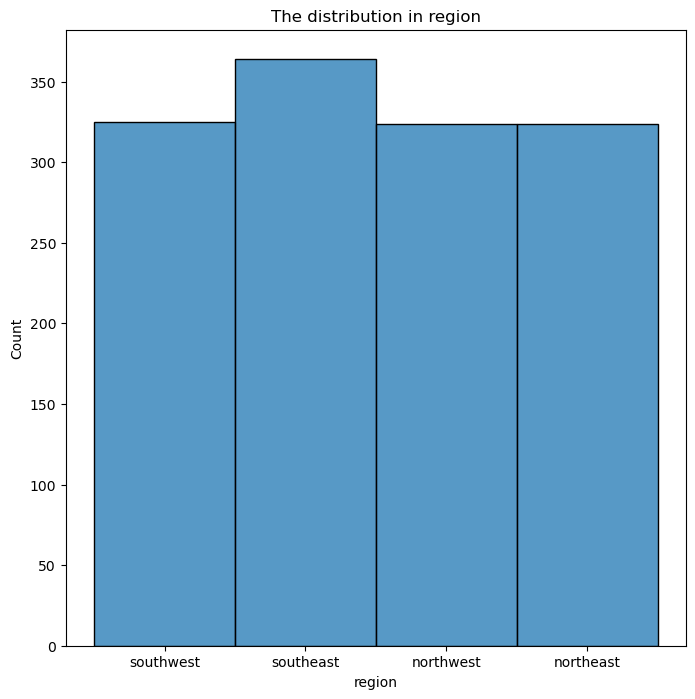

In [108]:
# UniVariate Analysis

plt.figure(figsize = (6,6))
sns.histplot(df["region"])
plt.title("The distribution in region")
plt.show()

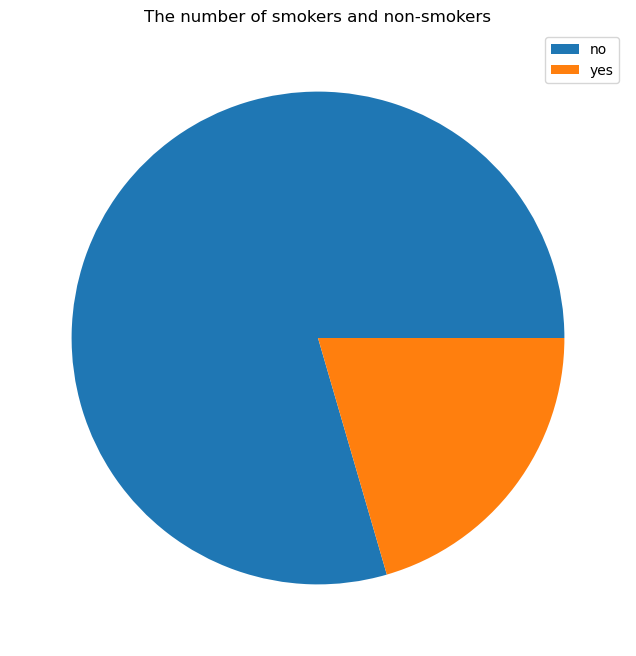

In [109]:
plt.figure(figsize = (8,8))
plt.pie(df["smoker"].value_counts())
plt.legend(["no" , "yes"])
plt.title("The number of smokers and non-smokers")
plt.show()

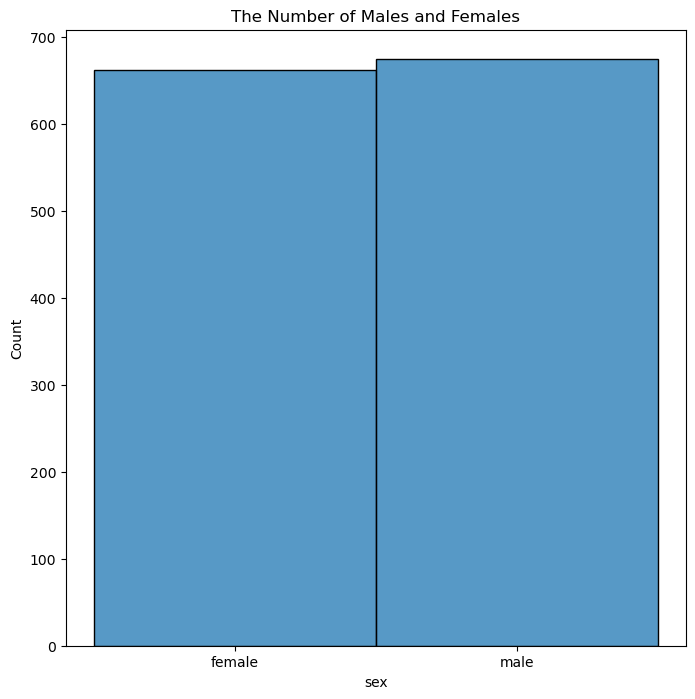

In [110]:
plt.figure(figsize = (8,8))
sns.histplot(df["sex"])
plt.title("The Number of Males and Females")
plt.show()

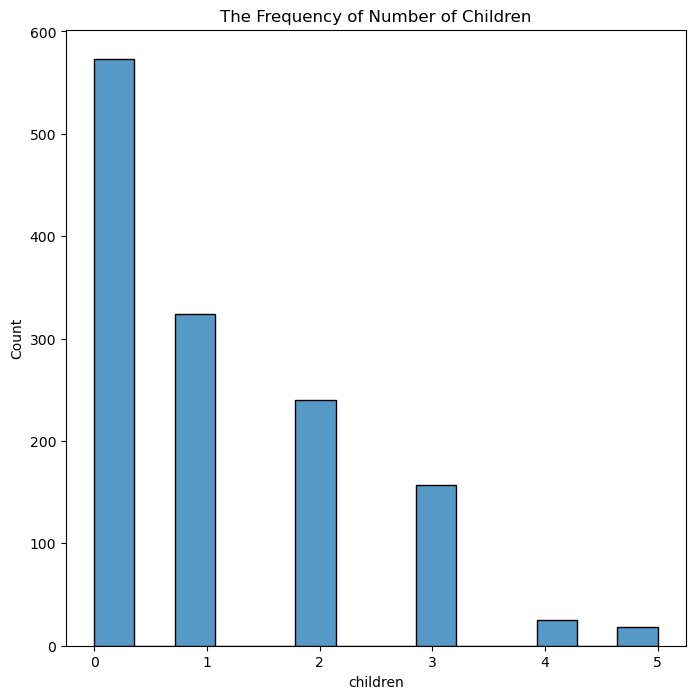

In [111]:



plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df)
plt.title('Frequency of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

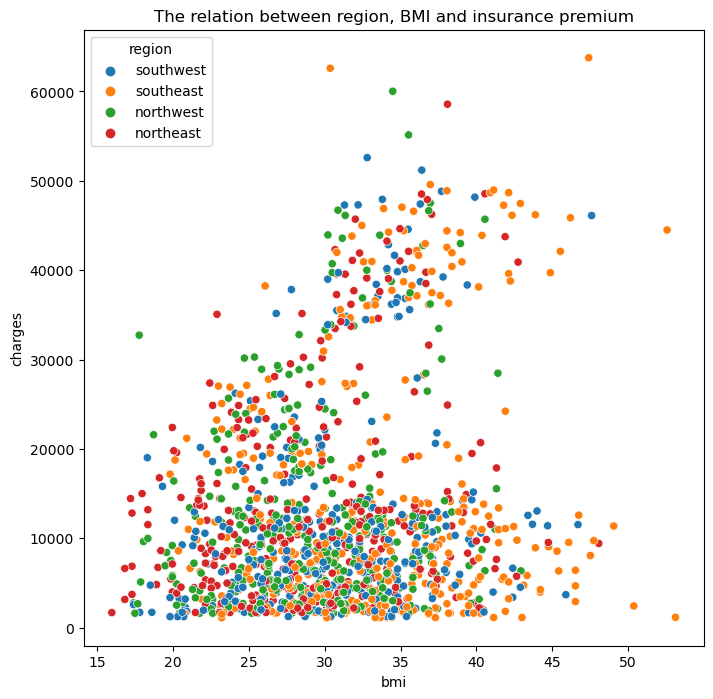

In [112]:
# Bivariate and Multivariate Analysis

plt.figure(figsize = (8 , 8))
sns.scatterplot(data = df , x = "bmi" , y = "charges" , hue = "region")
plt.title("The relation between region, BMI and insurance premium")
plt.show()

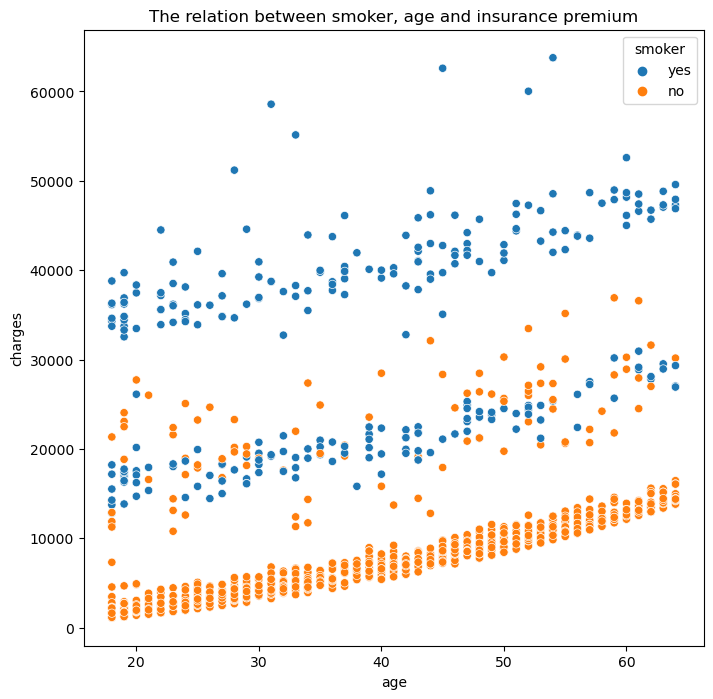

In [113]:
# Bivariate and Multivariate Analysis

plt.figure(figsize = (8 , 8))
sns.scatterplot(data = df , x = "age" , y = "charges" , hue = "smoker")
plt.title("The relation between smoker, age and insurance premium")
plt.show()


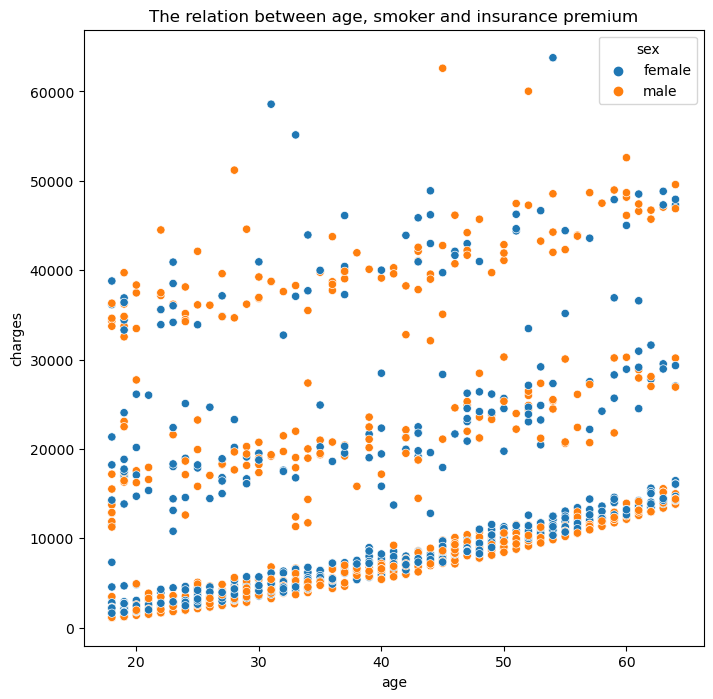

In [114]:
plt.figure(figsize = (8 , 8))
sns.scatterplot(data = df , x = "age" , y = "charges" , hue = "sex")
plt.title("The relation between age, smoker and insurance premium")
plt.show()

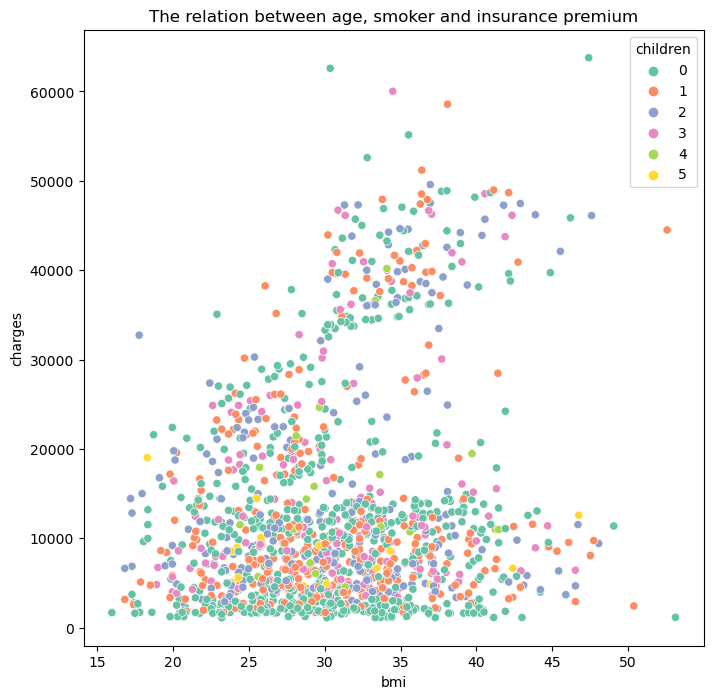

In [115]:
plt.figure(figsize = (8 , 8))
sns.scatterplot(data = df , x = "bmi" , y = "charges" , hue = "children" , palette = "Set2")
plt.title("The relation between age, smoker and insurance premium")
plt.show()

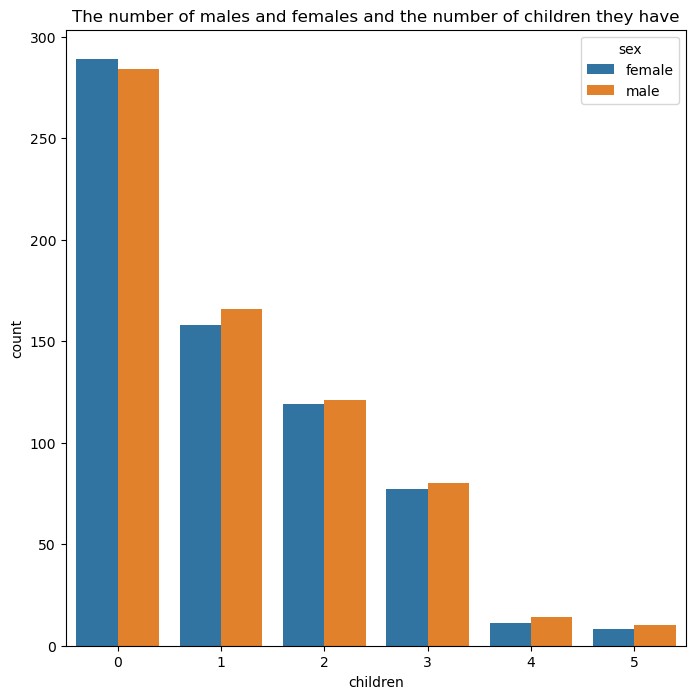

In [116]:
plt.figure(figsize = (8,8))
sns.countplot(data = df , x = "children" , hue = "sex")
plt.title("The number of males and females and the number of children they have")
plt.show()

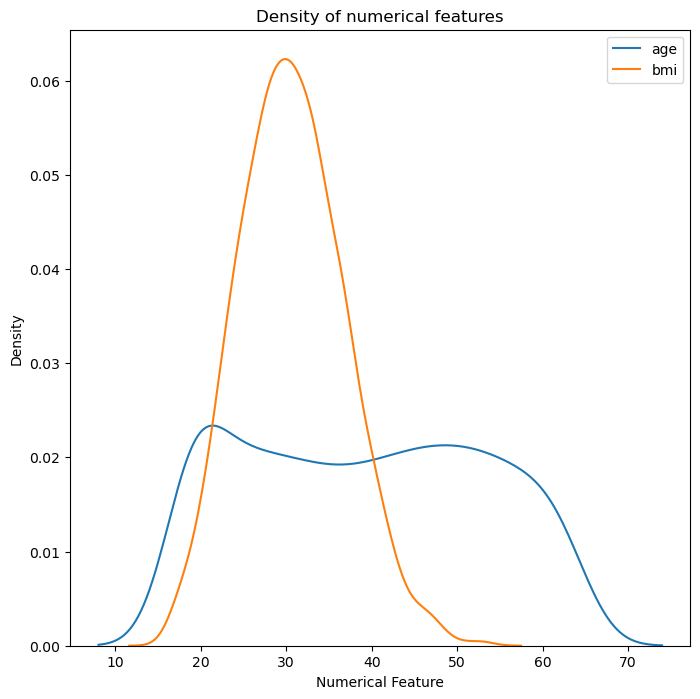

In [117]:
plt.figure(figsize = (8,8))
sns.kdeplot(df["age"])
sns.kdeplot(df["bmi"])
plt.title("Density of numerical features")
plt.legend(["age" , "bmi"])
plt.xlabel("Numerical Feature")
plt.show()

In [118]:
# Converting Categorical data into Numerical Data

df["smoker"] = df["smoker"].replace({"yes" : 1 , "no" : 0})
df["sex"] = df["sex"].replace({"male" : 0 , "female" : 1})
df["region"] = df["region"].apply({"southwest" : 1 , "southeast" : 2 , "northeast" : 3 , "northwest" : 4}.get)

In [119]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,0,4,10600.5483
1334,18,1,31.92,0,0,3,2205.9808
1335,18,1,36.85,0,0,2,1629.8335
1336,21,1,25.80,0,0,1,2007.9450
1337,61,1,29.07,0,1,4,29141.3603


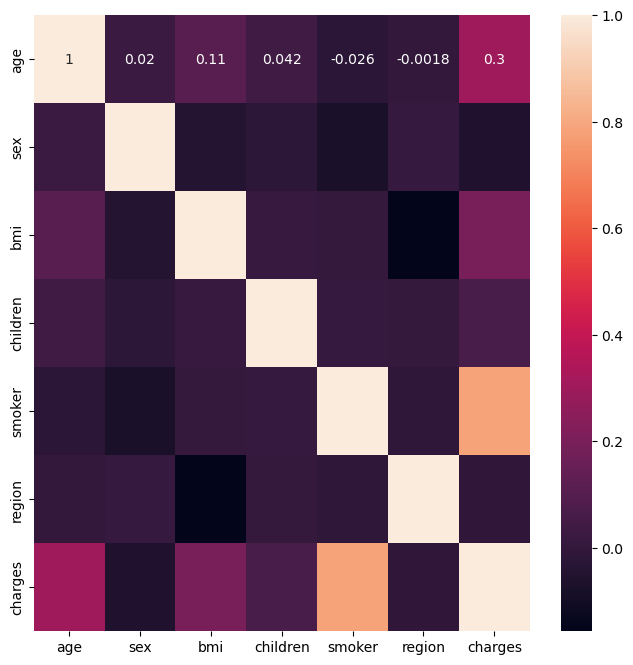

In [120]:
# correlation analysis

plt.figure(figsize = (8,8))
sns.heatmap(df.corr() , annot = True)
plt.show()

In [121]:
#Importing Dictionaries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [122]:
# X and Y variables

y = df["charges"]
df.drop("charges" , axis =1 , inplace = True)
x = df

In [123]:
# Splitting Training and Testing Dataset

xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [124]:
# Building Model

mod = LinearRegression()
mod.fit(xtrain , ytrain)

LinearRegression()

In [125]:
# Predicting Values

pred = mod.predict(xtest)

In [126]:
# Metrics

print("The training accuracy is " , mod.score(xtrain , ytrain)*100 , "%")
print("The testing accuracy is " , mod.score(xtest , ytest)*100 , "%")
print("The mean absolute error is " , mean_absolute_error(pred , ytest))
print("The mean squared error is ", mean_squared_error(pred , ytest))

The training accuracy is  72.9449036210828 %
The testing accuracy is  80.61028038524825 %
The mean absolute error is  4184.992650402236
The mean squared error is  35629785.59267284


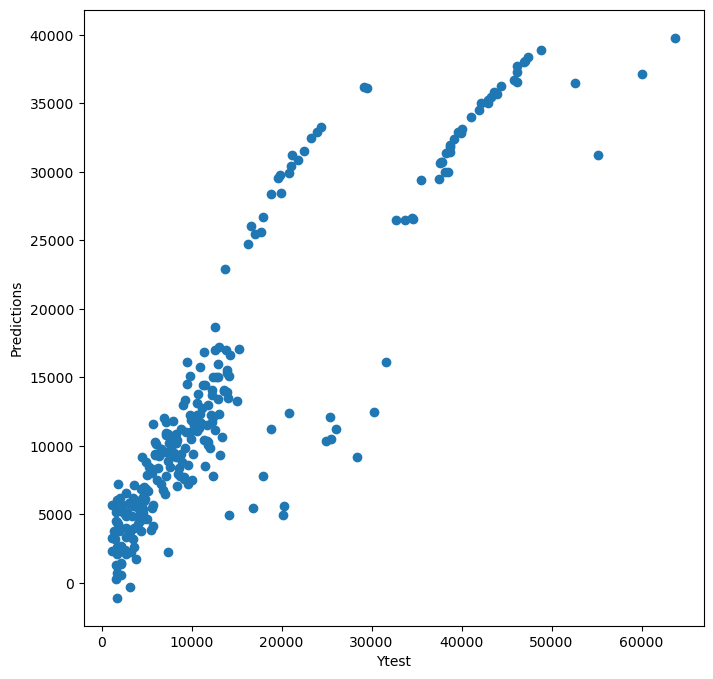

In [127]:
# Regression Plot

plt.figure(figsize = (8,8))
plt.scatter(ytest , pred)
plt.xlabel("Ytest")
plt.ylabel("Predictions")
plt.show()

In [128]:
dic = {"age" : 15 , "sex" : 1 , "bmi" : 25 , "children" : 0 , "smoker" : 0 , "region" : 4}
df_check = pd.DataFrame(dic , index = [0])
mod.predict(df_check)

array([382.49046827])

In [129]:
# Model Building : gradient boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
# Initialize and train the model
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBR.fit(xtrain, ytrain)

# Predict on test set
ypred_2 = GBR.predict(xtest)

In [130]:


ypred_2

array([10160.64952059,  7974.35697513, 13322.46273522, 39108.08743922,
        6627.33292578, 11235.83564346, 39038.6540651 ,  3757.48362351,
        8988.39329951, 11239.92909568, 13439.50581895, 24875.9946886 ,
       39137.47192709, 12934.86224495, 10398.6053945 ,  8837.83778807,
        4561.92163528, 39459.89562461,  4992.2586024 ,  5224.49531824,
        3548.89154271, 19691.25108813, 10502.37180222, 21166.02970417,
       39475.05427876,  7605.90638931, 43054.05141269, 45061.12466227,
       11479.22182109, 12973.66797229,  4830.44356435, 11051.11972124,
        3328.6522551 , 15972.32775641, 45896.18692754, 10395.48437275,
        6950.23164016,  6089.7856556 , 21806.42670905,  9191.97596025,
        3372.10990407, 20756.24256947, 40945.92094912, 11037.88024925,
        8627.61269869,  4066.97664935,  3562.40787996,  8469.2106038 ,
        5776.32571301,  7836.95492487,  7025.64749551,  6212.35619976,
       23473.28528961,  3166.719811  ,  7865.69507098,  9138.54397963,
      

In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(ypred_2, ytest)
mse = mean_squared_error(ypred_2, ytest)
r2 = r2_score(ytest, ypred_2)
print('Mean absolute error :',mae)
print('Mean squared error :',r2)
print('R^2 :', r2)

Mean absolute error : 2434.3001347793856
Mean squared error : 0.9034737694301922
R^2 : 0.9034737694301922


In [132]:
import pickle

filename = "Ttrained_model.sav"
pickle.dump(mod , open(filename , "wb"))

loaded_model = pickle.load(open("Ttrained_model.sav" , 'rb'))